## learning-AI101 : glass classification
### 유리 데이터를 KNN, SVM, logistic regression, decision tree, random forest, K-means로 classification

<br>

- **임규연 (lky473736)**
- 2024.07.27. ~ 2024.07.28.에 문서 작성
- **dataset** : https://archive.ics.uci.edu/dataset/42/glass+identification
- **kaggle** : https://www.kaggle.com/datasets/uciml/glass
- **data abstract** : Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through VRS Consulting, Inc.; 4676 Admiralty Way, Suite 206; Marina Del Ray, CA 90292 (213) 827-7890 and FAX: -3189. In determining whether the glass was a type of "float" glass or not. The study of classification of types of glass was motivated by criminological investigation.  At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!
- **memo** : <혼자 공부하는 머신러닝&딥러닝> 1회독을 하였고, 본 문서를 작성하면서 전체적으로 책에 있는 내용을 다시 따라하고 복습하려고 한다. 따라서 스스로 내 자신을 가르친다고 생각하고 설명을 길게 작성하면서 classification을 진행한다.

------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

-------

### 1. 데이터 EDA (탐색적 데이터 분석)

classification을 진행하기 전, 데이터 구조를 파악한다.

- **데이터 구조 파악 및 EDA**
    - 각 feature가 의미하는 바를 분석, 결측치 파악 후 어떻게 classification을 진행하는 것이 탁월할 지 파악
    - 각 feature에 대한 사분위수, mean, max, min, median, corr
    - target의 도수를 bar plot 시각화
    - seaborn을 통한 corr 상관관계 및 histplot 시각화
    - 각 attribute에 대한 box plot 시각화

#### 1-1) 파일 열기
현재 ./data/glass에 데이터를 다운로드하였고, 데이터 파일은 아래와 같다.

```sh
alphastation:learning-ai101 alphastation$ ls -lha ./report/data/glass
total 48
drwx------@  6 alphastation  staff   192B  7 27 14:33 .
drwxr-xr-x  10 alphastation  staff   320B  7 27 14:34 ..
-rwx------@  1 alphastation  staff   139B  5 22  2023 Index
-rwx------@  1 alphastation  staff    12K  5 22  2023 glass.data
-rwx------@  1 alphastation  staff   3.4K  5 22  2023 glass.names
-rwx------@  1 alphastation  staff   780B  5 22  2023 glass.tag
```

파일을 차례대로 설명하자면, 
- Index : 말 그대로, 데이터 파일의 index를 붙여주는 쉘 스크립트 프로그램 같다.
- glass.data : 실질적인 data의 records가 들어있다.
- glass.names : glass data 분석을 어떻게 하면 좋을지 가이드라인이 적혀져 있으며, 각 feature의 분포를 설명하고 있다.
- glass.tag : glass data의 attribute 이름이 적혀있다.

glass.tag에 적혀져 있는 각 attribute는 아래와 같다.
```txt
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
```

따라서, 데이터프레임을 만들어 데이터 분석을 하기 위해, **glass.data의 확장자를 .csv로 변경한 후, 파일을 열어 dataframe으로 변환 후, head와 info를 확인**한다.

In [3]:
# 일단은, glass.data를 열어 30줄 정도 출력한다.

f = open('./data/glass/glass.data', 'r')

for row in range (30) :
    line = f.readline()
    print (line)
    
f.close ()

# 차례대로 Id, RI, Na, Mg, Al, Si, K, Ca, Ba, Fe, target of glass

1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00,1

2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1

3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1

4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1

5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1

6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1

7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00,1

8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1

9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00,1

10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,1

11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.00,0.24,1

12,1.51763,12.80,3.66,1.27,73.01,0.60,8.56,0.00,0.00,1

13,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24,1

14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1

15,1.51763,12.61,3.59,1.31,73.29,0.58,8.50,0.00,0.00,1

16,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00,1

17,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,1

18,1.52196,14.36,3.85,0.89,71.36,0.15,9.15,0.00,0.00,1

1

위를 확인해보니, 본 파일엔 header가 첫 행에 지정되어 있지 않다. 따라서 추후에 dataframe으로 변환 시 header를 glass.tag에 적혀져 있는 attribute로 두어야 할 것이다.

In [4]:
# 파일 확장자 변경

import os # os 라이브러리로 파일 확장자 변경할 예정

os.rename('./data/glass/glass.data', './data/glass/glass.csv')

In [6]:
# dataframe으로 읽어들이기 (변환) 및 header 지정

header = ['id', 'RI', 'Na', 'Mg', 
          'Al', 'Si', 'K', 'Ca', 
          'Ba', 'Fe', 'target']
df = pd.read_csv('./data/glass/glass.csv', names=header)

In [7]:
# head로 5개 records 읽기

df.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
# info로 data의 기본 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  target  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


#### 1-2) 기초 통계량 분석 및 classification 전략 도출

In [12]:
# df의 행 갯수, 열 갯수, 각 열 명 파악
df.shape, df.columns

((214, 11),
 Index(['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'target'], dtype='object'))

In [13]:
# describe (데이터 타입은 info()로 보았으니 pass)

df.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


id와 target을 제외한 나머지 attribute만 분석하자면 아래와 같다.

- 일단은, 현재 모든 records의 count 수가 214개로 같은 것을 보아 결측치는 확인되지 않는다.
- 각자 범위(max - min)가 매우 달라 추후에 logistic regression이나 SVM을 위하여 standard scaling이 필요해 보인다. 
    - decision tree는 스케일링이 필요 없다.

classification 전략을 세우자면 아래와 같다.

- 물론 추후에 heatmap을 그려보아야 알겠지만, 상관계수가 낮은 feature를 학습에 제외시켜 curse of dimensionality를 막을 수도 있을 것이다. 심한 overfitting일 시 추후에 고려해보자.
- https://archive.ics.uci.edu/dataset/42/glass+identification 의 "baseline model performance"에서도 나와있듯이, 현재 시도하고자 하는 모델 중 random forest가 가장 효율성이 좋아서 실제로 그러한 지 확인해보도록 하자. 
- 위의 것을 하기 위해선, 맨 마지막에 각 모델 별로 score를 비교하는 plot을 이용한 visualization이 필요해 보인다.


#### 1-3) target의 갯수를 bar plot으로 시각화

In [14]:
# bar plot 그려 target의 도수 파악
# 도수를 알기 위해 unique 매소드 사용

target = np.unique(df['target'])
print (target)

[1 2 3 5 6 7]


glass.names에서도 설명이 나와있는데, target 중 4는 본 데이터에서 아예 존재하지 않는다.

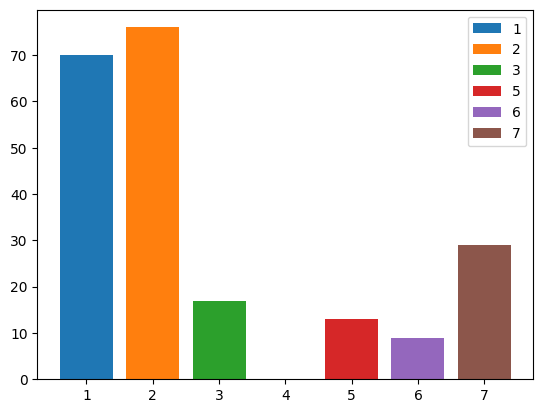

In [16]:
# 시각화 진행

for compo in target : 
    plt.bar(compo, len(df[df['target'] == compo]), label=str(compo))

plt.legend()
plt.show()

위를 확인해보면, target 도수가 불균형하여 추후 분류 시 편향이 발생할 가능성이 높다. 따라서 **train_test_split 함수에서 stratify 옵션을 사용**하는 것이 핵심이 되겠다. 이 옵션은 학습 데이터셋과 테스트 데이터셋 내에서 목표 변수의 분포를 동일하게 유지할 것이다.

#### 1-4) seaborn을 통한 상관관계 heatmap 및 전체 histplot 시각화

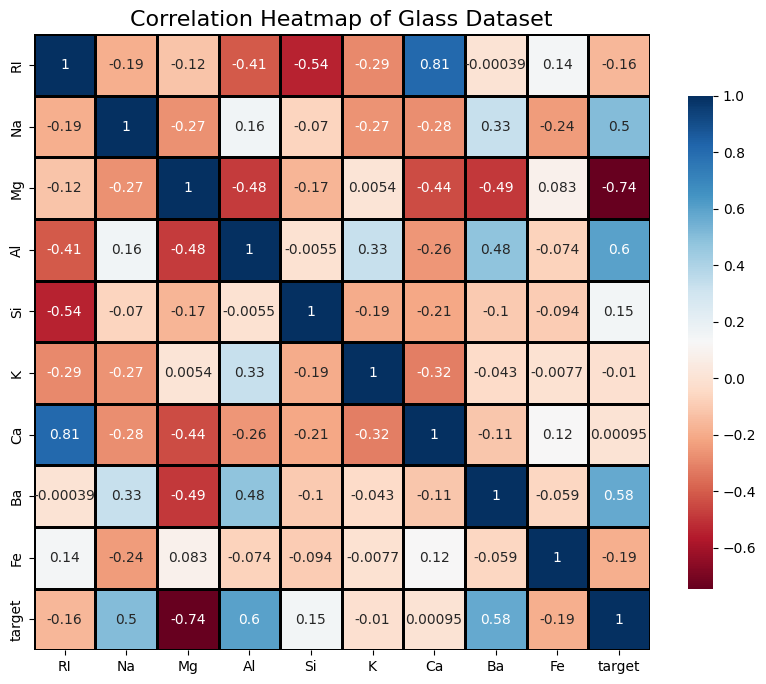

In [19]:
# seaborn을 통하여 heatmap 시각화
# 상관계수 행렬, 각 변수 간의 선형적 관계를 시각적으로 표시

# id 열은 제외
correlation_matrix = df[['RI', 'Na', 'Mg', 
                         'Al', 'Si', 'K', 
                         'Ca', 'Ba', 'Fe', 'target']].corr() 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', square=True,
            linewidths=1, linecolor='black', cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap of Glass Dataset', fontsize=16)
plt.show()

위 heatmap는 음수로 갈 수록 음의 상관관계(반비례), 양수로 갈 수록 양의 상관관계(정비례)를 의미한다. 또한 diagonal을 중심으로 각 part가 대칭이다. (symmetric) figure를 보고 주목해야 할 부분은 아래와 같이 분석할 수 있다.

- **높은 양의 상관관계**
    - **RI와 Ca** : 상관계수 = 0.81
      - 굴절률(RI)이 높을수록 유리 내 칼슘(Ca) 함량이 높을 것이다.

    - **Na와 target** : 상관계수 = 0.5
      - 나트륨(Na) 함량이 높을수록 target 또한 높아진다.

    - **Al와 target** : 상관계수 = 0.6
      - 알루미늄(Al) 함량이 높을수록 target 또한 높아진다.

    - **Ba와 target** : 상관계수 = 0.58
      - 바륨(Ba) 함량이 높을수록 target 또한 높아진다.
      
- **높은 음의 상관관계**
    - **Mg와 target** : 상관계수 = -0.74
      - 마그네슘(Mg) 함량이 높을수록 target은 낮아진다.
    - **RI와 Si** : 상관계수 = -0.54
      - 굴절률(RI)이 높을수록 유리 내 실리콘(Si) 함량이 낮을 것이다.
    - **Al와 Mg** : 상관계수 = -0.48
      - 알루미늄(Al) 함량이 높을수록 마그네슘(Mg) 함량이 낮을 것이다.
    - **Ca와 Mg** : 상관계수 = -0.44
      -  칼슘(Ca) 함량이 높을수록 마그네슘(Mg) 함량이 낮을 것이다.

위 **높은 양의 상관관계**를 주목할 것. target이 의미하는 바를 다시 정리해보자면 아래와 같다.

- **building_windows_float_processed (건축물의 플로트 공정 창문)**: 건축물에 사용되는 플로트 공정으로 처리된 창문 유리
- **building_windows_non_float_processed (건축물의 비플로트 공정 창문)**: 건축물에 사용되는 비플로트 공정으로 처리된 창문 유리
- **vehicle_windows_float_processed (차량의 플로트 공정 창문)**: 차량에 사용되는 플로트 공정으로 처리된 창문 유리
- **vehicle_windows_non_float_processed (차량의 비플로트 공정 창문)**: 차량에 사용되는 비플로트 공정으로 처리된 창문 유리 (이 데이터베이스에는 존재 X)
- **containers (용기)**: 병이나 항아리와 같은 용기 유리
- **tableware (식기류)**: 접시나 컵과 같은 식기류 유리
- **headlamps (헤드램프)**: 차량의 헤드램프에 사용되는 유리

높은 양의 상관관계에서 각 feature에 따라서 비례적인 상관관계를 가지기 때문에, 이 사실을 regression을 이용할 때 참고할 수 있다고 생각한다. **./regression_diabetes**을 보면, 각 model에 대한 score가 처참한 것을 확인 가능한데, 이번 regression에서는 알짜베기 feature (학습에 도움이 될, 상관관계가 높은 feature) 만 selection하여 score을 최대한 높이는 데에 초점을 둘 것이다.

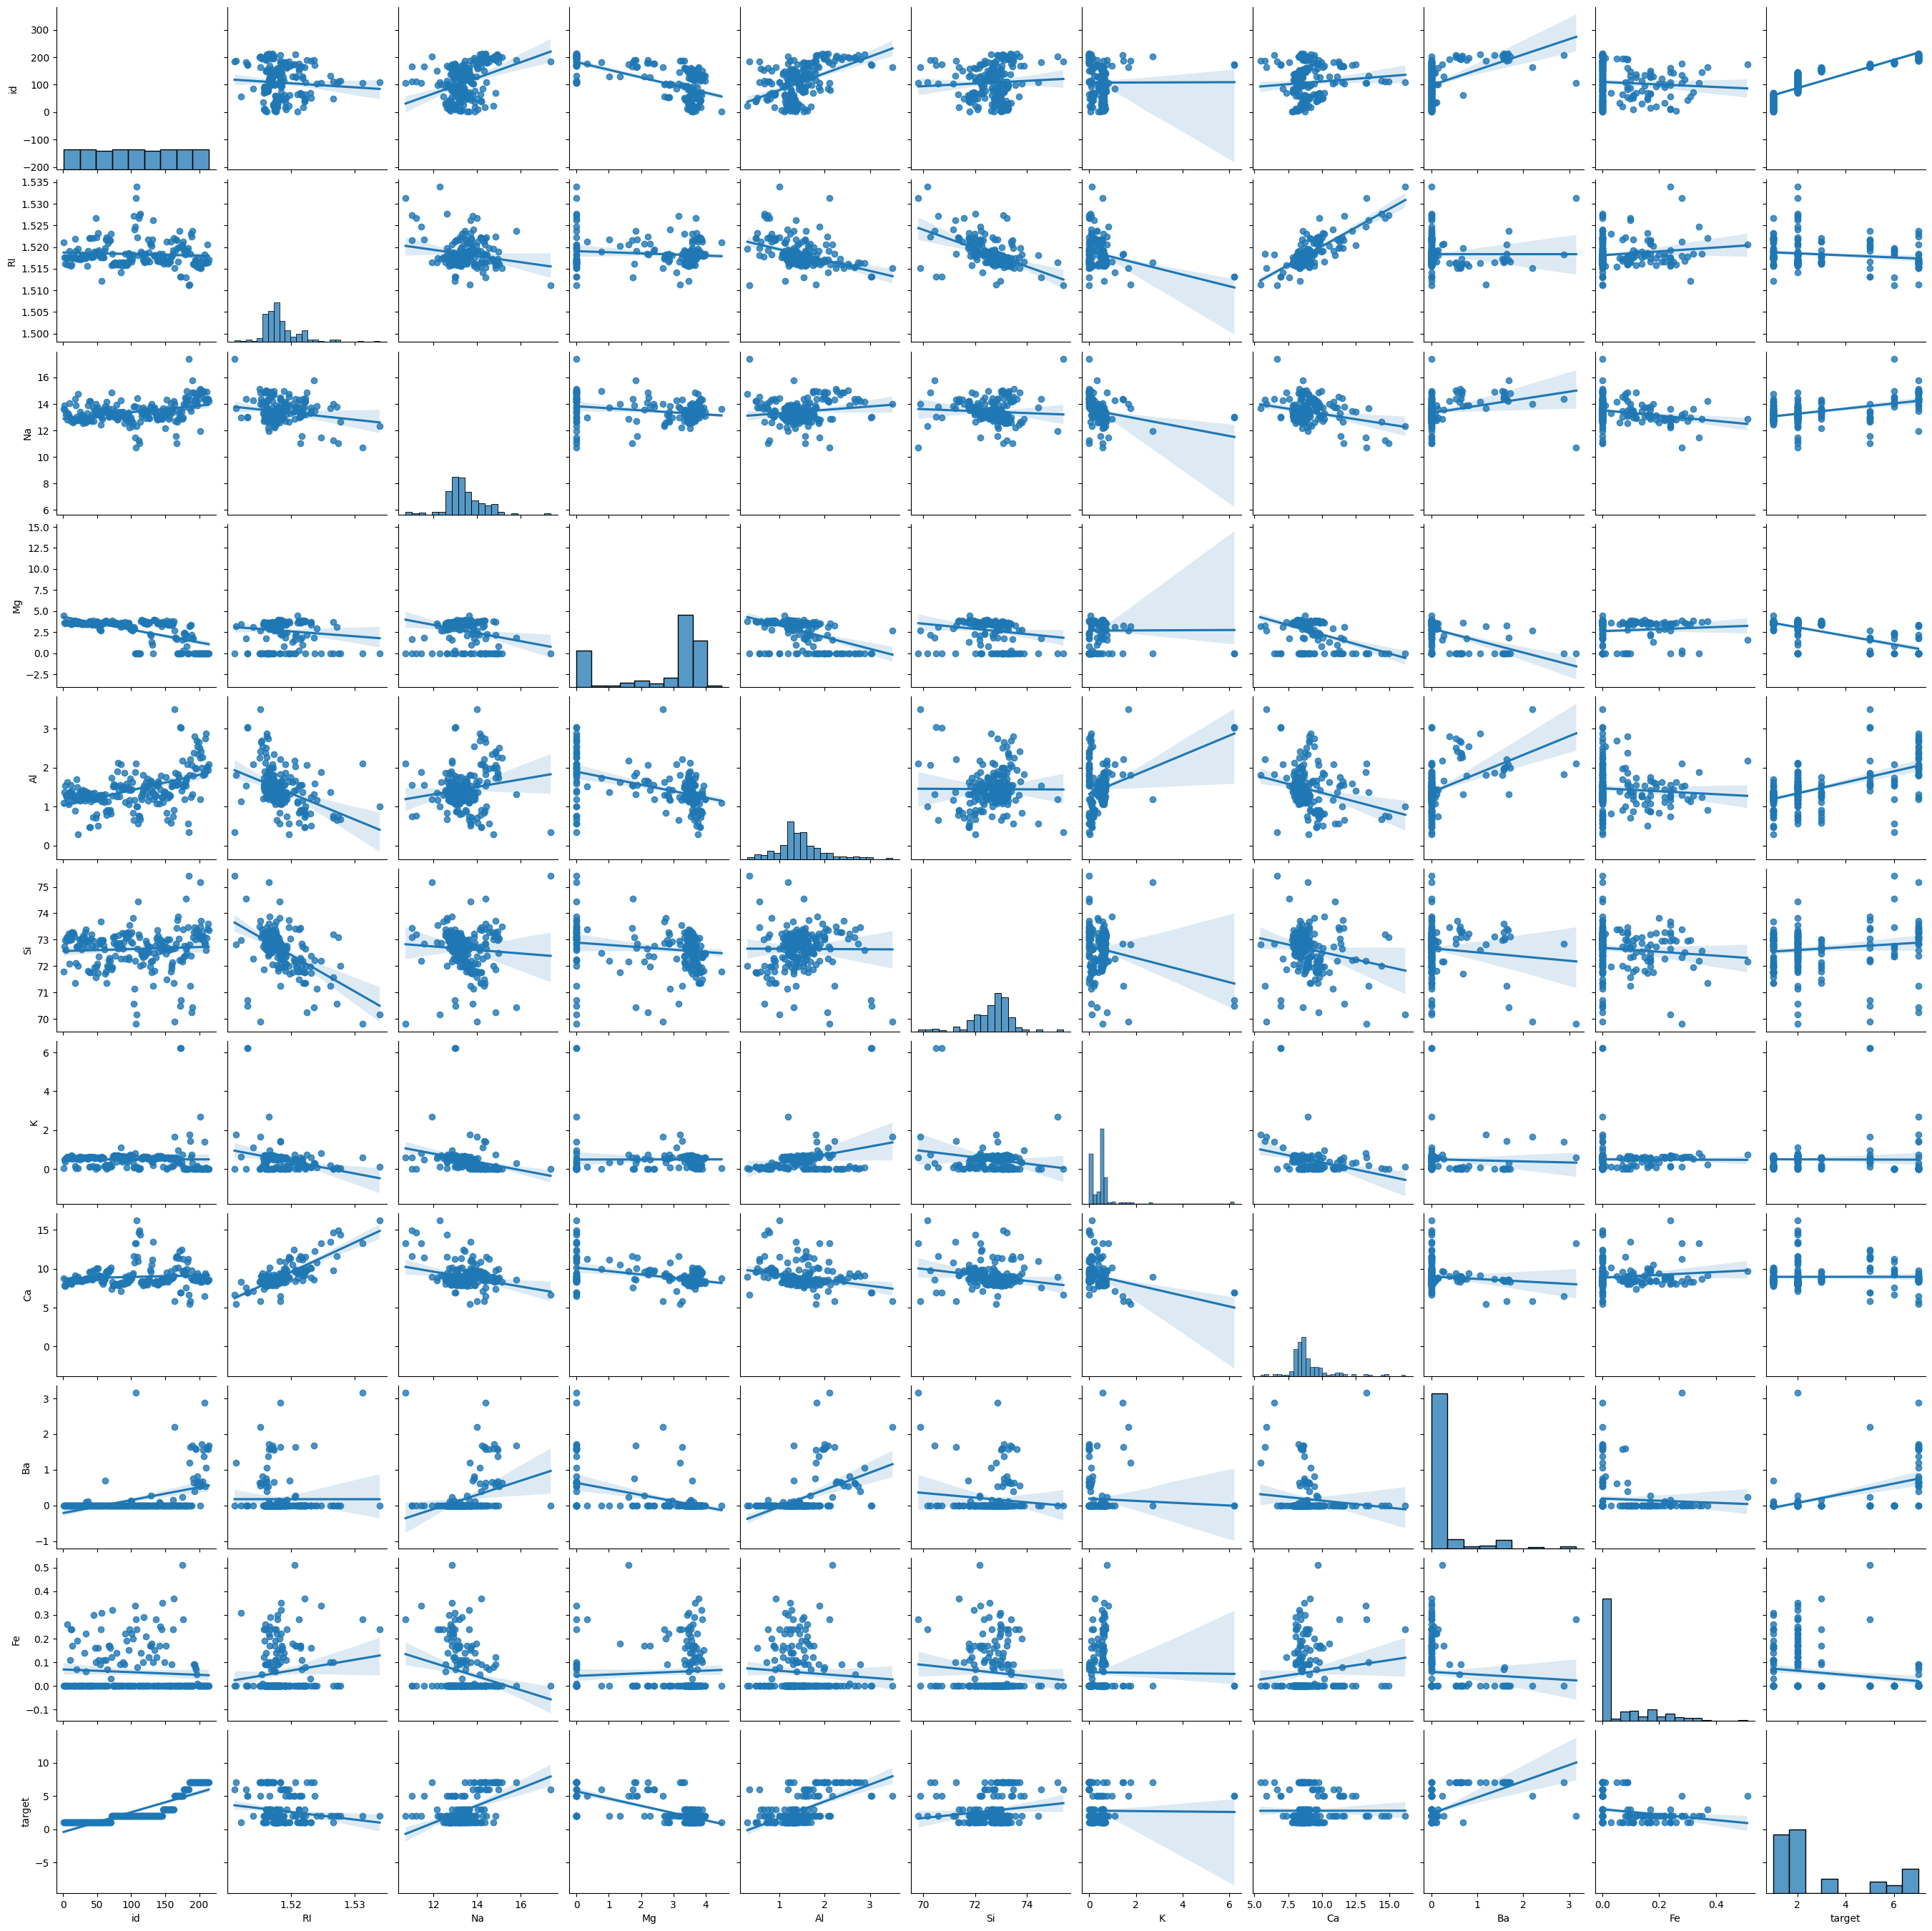

In [20]:
# seaborn을 통하여 pairplot 시각화
# 현재 데이터프레임의 모든 열 쌍에 대한 산점도와 히스토그램을 시각화한다

sns.pairplot(df[df.columns], kind="reg") 
plt.show()

------

#### 1-5) 각 attribute에 대한 box plot 시각화

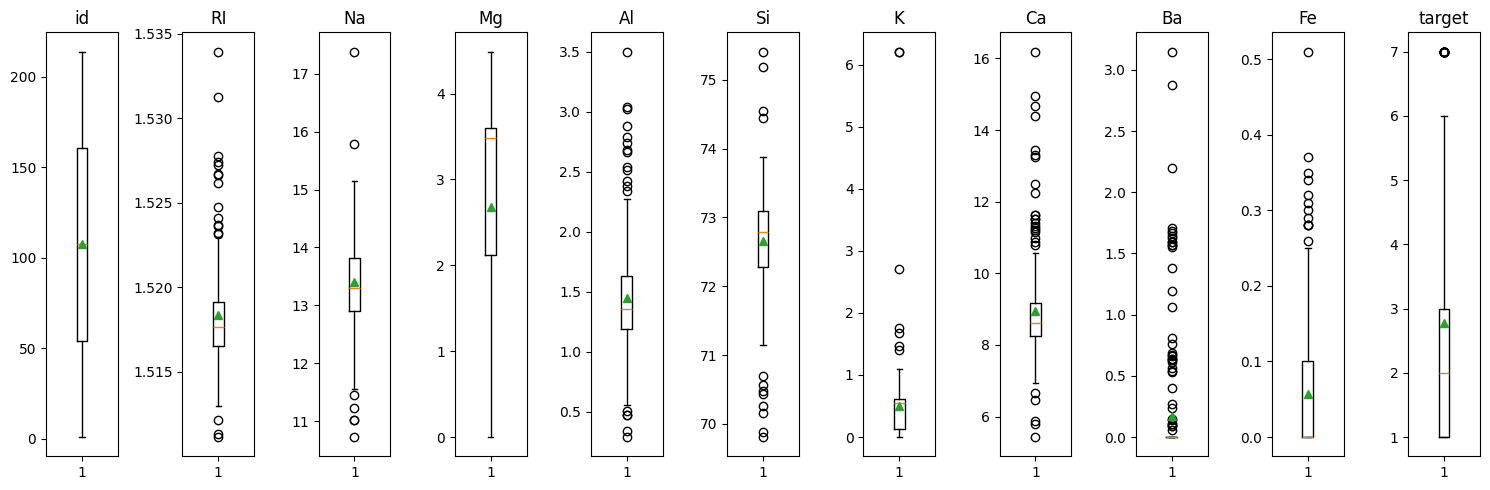

In [21]:
# box plot 그려 데이터 분포 확인

# subplot 생성
fig, axes = plt.subplots(nrows=1, ncols=df.shape[1], figsize=(15, 5))

# 각 변수에 대한 boxplot 그리기
for i, var in enumerate(df.columns) :
    ax = axes[i]
    ax.boxplot(df[var], showmeans=True)
    ax.set_title(var)

plt.tight_layout()
plt.show()

------

### 2. 데이터 전처리

1에서 분석한 바를 토대로 전처리를 진행한다.
- **전처리**
    - 결측치는 그 feature (열)의 평균으로 fill
    - Z-score normalization 진행 
    - 특정 열 삭제

#### 2-1) 'id' 열 삭제
- id 열은 각 records의 번호를 의미하면서, 이것이 현 classification이 사용되지는 않는다.
- 따라서 drop을 이용해 삭제할 예정.

In [22]:
# 'id'열 삭제

df = df.drop('id', axis=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### 2-2) 결측치 확인 및 fill 

In [27]:
# 결측치 확인

df.isnull()

# info에서도 확인하였듯이, 결측치 없음

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
209,False,False,False,False,False,False,False,False,False,False
210,False,False,False,False,False,False,False,False,False,False
211,False,False,False,False,False,False,False,False,False,False
212,False,False,False,False,False,False,False,False,False,False


위를 보면, 본 데이터에 결측치가 **전혀** 존재하지 않고 있다. 따라서 결측치에 따른 전처리를 진행하지 않아도 된다.

#### 2-3) 정규화 (normalization) - Z-score normalization

- 각 feature의 scale이 서로 달라, SVM, logistic regression 전에 StandardScaler를 통한 스케일링이 필요
- 따라서 StandardScaler를 통한 Z-score normalization을 수행

In [28]:
# input과 target으로 df를 split

glass_input = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].to_numpy() 
glass_target = df['target'].to_numpy()

In [30]:
# X_train, y_train, X_test, y_test으로 train set, test set 각각 8:2로 split
# stratify 옵션을 적용하여 편향 방지

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(glass_input, glass_target, 
                                                   stratify=glass_target, 
                                                    test_size=0.2)

In [31]:
# StandardScaler을 통한 정규화 진행

from sklearn.preprocessing import StandardScaler
ss_transformer = StandardScaler()

ss_transformer.fit(X_train)

X_train_scaled = ss_transformer.transform(X_train)
X_test_scaled = ss_transformer.transform(X_test)

In [33]:
# score가 좋지 않을 때, 추후 사용할 data (feature selection)
# 사용할 feature : Na, Al, Ba

glass_input_fs = df[['Na', 'Al', 'Ba']].to_numpy() 

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(glass_input_fs, glass_target, 
                                                   stratify=glass_target, 
                                                    test_size=0.2)

ss_transformer = StandardScaler()

ss_transformer.fit(X_train_fs)

X_train_fs_scaled = ss_transformer.transform(X_train_fs)
X_test_fs_scaled = ss_transformer.transform(X_test_fs)

-------

### 3. 각종 모델을 적용하여 classification
- KNN, SVM, logistic regression, decision tree, random forest, K-means 사용하여 classification
- 순서는 KNN, SVM, logistic regression, decision tree, random forest, K-means
- **CAUTION** : <혼자 공부하는 머신러닝&딥러닝>의 '머신러닝' 파트를 복습하면서 진행하는 것이기 때문에 설명이 길 수 있음

#### 3-1) KNN

<img src='https://miro.medium.com/v2/resize:fit:1400/0*ksMa1Of3NFCvHo_Y' width='500px'>

- 